Exploring your Data
----
Essentially, the previous chapters have really covered on the basics of experiments, but we've really not looked much into what to first do to your data when you initally gather it and want to test what it contains.

Exploring One-Dimensional Data
----
Sometimes your data is simply a singular dimension or variable, and needs to be analyzed with less scrutany than simply plotting. One method to analyze the a rough outline of the data is to bucketize the variable into discrete ranges of values, such that the ranges could be analyzed and compared.

In [2]:
# Imports and necessary definitions from previous chapters
import random                   # random.random()
import math                     # math.erf
from collections import Counter # Counter
import matplotlib.pyplot as plt # Plotting
import numpy as np

# Definitions
def normal_cdf(x, mu=0, sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
            
    low_z, low_p = -10.0, 0
    hi_z,  hi_p  =  10.0, 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2
        mid_p = normal_cdf(mid_z)
        if mid_p < p:
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            hi_z, hi_p = mid_z, mid_p
        else:
            break
                        
    return mid_z

In [3]:
def bucketize(point, bucket_size):
    """floor the point to the next lower multiple of bucket_size"""
    return bucket_size*math.floor(point / bucket_size)

def make_histogram(points, bucket_size):
    """buckets the points and counts how many in each bucket"""
    return Counter(bucketize(point, bucket_size) for point in points)

def plot_histogram(points, bucket_size, title=""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)
    plt.show()

For example, consider these data:
---

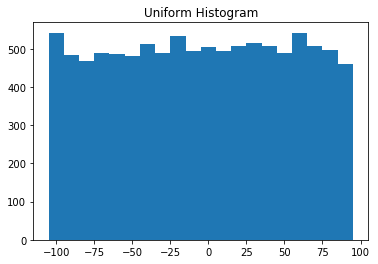

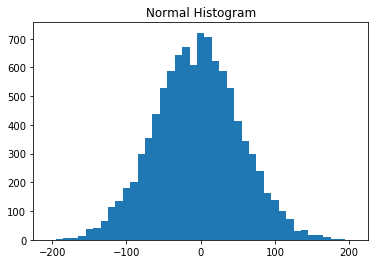

In [4]:
# Seed the random function to allow reproducible results
random.seed(0)

# Uniform between -100 and 100
uniform = [200 * random.random() - 100 for _ in range(10000)]

# Normal distribution with mean 0, std dev 57
normal  = [57 * inverse_normal_cdf(random.random()) for _ in range(10000)]

# Plot Uniform
plot_histogram(uniform, 10, "Uniform Histogram")

# Plot Normal
plot_histogram(normal, 10, "Normal Histogram")

Continuing to explore Two Dimensional Data
---

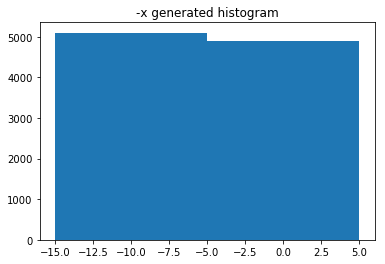

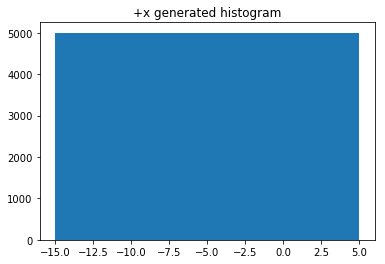

ys1 mean: -0.0114268751144
ys2 mean: 0.00115180587769
ys1 s.d.: 1.11025880199
ys2 s.d.: 1.09930910961


In [5]:
def random_normal():
    """returns a random draw from a standard normal distribution"""
    return inverse_normal_cdf(random.random())

# Create two dummy datasets of random normal variables
# Notice, ys1 and ys2 have similar outputs, though -x and x
xs  = [random_normal() for _ in range(10000)]
ys1 = [-x + random_normal() / 2 for x in xs]
ys2 = [x + random_normal() / 2 for x in xs]

# Notice the near exact similarity
plot_histogram(ys1, 10, "-x generated histogram")
plot_histogram(ys2, 10, "+x generated histogram")
print("ys1 mean: " + str(np.mean(ys1)))
print("ys2 mean: " + str(np.mean(ys2)))
print("ys1 s.d.: " + str(np.std(ys1)))
print("ys2 s.d.: " + str(np.std(ys2)))

But each has a very different joint distribution with xs, as shown:
----

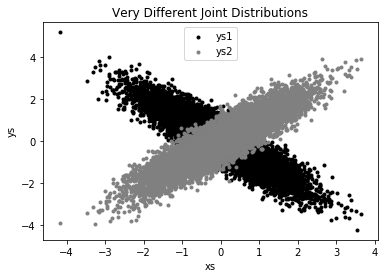

In [6]:
plt.scatter(xs, ys1, marker='.', color='black', label='ys1')
plt.scatter(xs, ys2, marker='.', color='gray',  label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Very Different Joint Distributions")
plt.show()

This would also be apparent if we were to analyze the correlations:
----
Note: All libraries from previous chapters necessary for correlation defined here.

In [11]:
# Linear Analysis---------------------------------
def dot(v, w):
    return sum(v_i * w_i for v_i, w_i in zip(v,w))

def sum_of_squares(v):
    return dot(v, v)

# Statistics Analysis-----------------------------
def mean(x):
    return sum(x) / len(x)

def de_mean(x):
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def variance(x):
    n          = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

def standard_deviation(x):
    return math.sqrt(variance(x))

def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)

def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0. and stdev_y > 0.:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0
#-------------------------------------------------

print(correlation(xs, ys1))
print(correlation(xs, ys2))

-0.892229994323
0.891372001589


Many Dimensions
----
Next we'll define a function for generating a correlation matrix

In [13]:
def correlation_matrix(data):
    """returns the num_columns x num_columns matrix whose (i, j)th entry
    is the correlation between columns i and j of data."""
    _, num_columns = shape(data)
    
    def matrix_entry(i, j):
        return correlation(get_column(gata, i), get_column(data, j))
    
    return make_matrix

Scatterplot Definition
----

In [19]:
_, num_columns = shape(data)
fig, ax = plt.subplots(num_columns, num_columns)

for i in range(num_columns):
    for j in range(num_columns):
        
        # scatter column_j on the x-acis as column_i on the y axis
        if i != j: ax[i][j].scatter(get_column(data, j), get_column(data, i))
            
        # unless i == j, in which case show the series name
        else: ax[i][j].annotate("series " + str(i), (0.5, 0.5),
                               xycoords='axes fraction',
                               ha="center", va="center")
            
        # then hide axis labels axcept left and bottom charts
        if i < num_columns - 1: ax[i][j].xaxis.set_visible(False)
        if j > 0: ax[i][j].yaxis.set_visible(False)
            
    # fix the bottom right and top left axis lavbels, which are wrong because
    # their charts only have text in them
    ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
    ax[0][0].set_ylim(ax[0][1].get_ylim())
    
    plt.show()

NameError: name 'shape' is not defined